c:\Users\LIM TZE TA\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\LIM TZE TA\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\LIM TZE TA\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorfl


--- XGBoost Regression Results (Yeo–Johnson Target) ---
MAE  = 116,750.07
RMSE = 235,582.99
R²   = 0.685


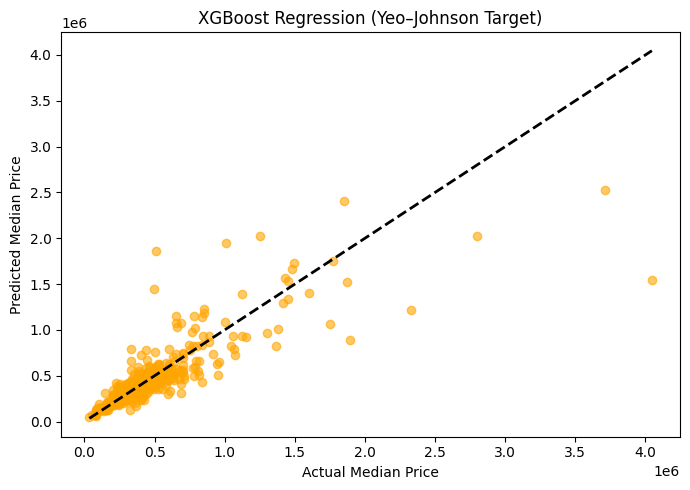

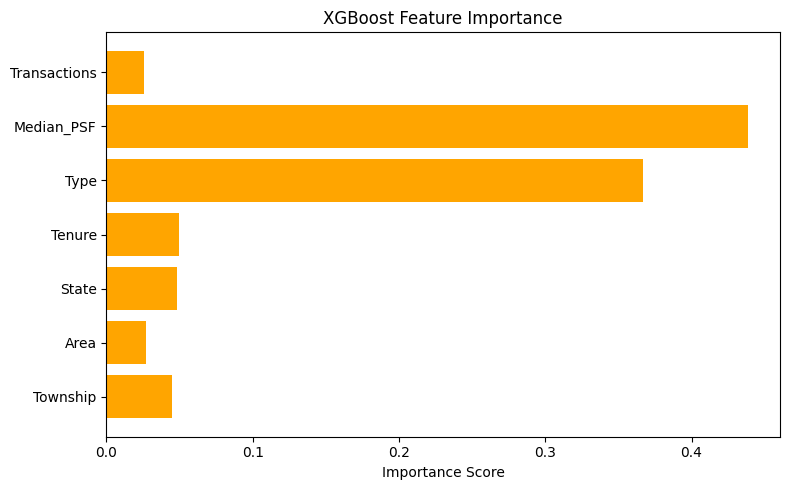

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Load Dataset (Already Label-Encoded)
df = pd.read_csv("malaysia_house_price_data_2025_label_encoded.csv")

# Separate Features and Target
X = df.drop(columns="Median_Price")
y = df["Median_Price"].values.reshape(-1, 1)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fix skewness
pt_X = PowerTransformer(method='yeo-johnson')
X_train_pt = pt_X.fit_transform(X_train)
X_test_pt = pt_X.transform(X_test)

pt_y = PowerTransformer(method='yeo-johnson')
y_train_trans = pt_y.fit_transform(y_train)
y_test_trans = pt_y.transform(y_test)


# Then standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pt)
X_test_scaled = scaler.transform(X_test_pt)

# Initialize and Train XGBoost Model
xgb = XGBRegressor(
    n_estimators=200, # No. of boosting rounds
    learning_rate=0.3, # Step size per boosting step
    max_depth=5, # Max depth of XGBoost tree
    subsample=0.8, # 80% of total data seen by each tree
    colsample_bytree=0.8, # Fraction of features randomly sampled for each tree
    random_state=42, # Fixed random seed
    reg_alpha=0.1,   # L1 regularization
    reg_lambda=1.0,  # L2 regularization
    n_jobs=-1
)

xgb.fit(X_train_scaled, y_train_trans.ravel()) # Flattens into 1D array

# Make Predictions
y_pred_trans = xgb.predict(X_test_scaled)

# Inverse Transform Predictions and Actuals
y_pred = pt_y.inverse_transform(y_pred_trans.reshape(-1, 1)).flatten()
y_actual = pt_y.inverse_transform(y_test_trans.reshape(-1, 1)).flatten()

# Evaluate Model Performance
mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
r2 = r2_score(y_actual, y_pred)

print("\n--- XGBoost Regression Results (Yeo–Johnson Target) ---")
print(f"MAE  = {mae:,.2f}")
print(f"RMSE = {rmse:,.2f}")
print(f"R²   = {r2:.3f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(7, 5))
plt.scatter(y_actual, y_pred, color='orange', alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         'k--', lw=2)
plt.xlabel("Actual Median Price")
plt.ylabel("Predicted Median Price")
plt.title("XGBoost Regression (Yeo–Johnson Target)")
plt.tight_layout()
plt.show()

# Feature Importance
plt.figure(figsize=(8, 5))
importances = xgb.feature_importances_
plt.barh(X.columns, importances, color='orange')
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 389821792256.0000 - mae: 484488.8125 - val_loss: 597174910976.0000 - val_mae: 504057.1875
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 389817565184.0000 - mae: 484486.3438 - val_loss: 597165342720.0000 - val_mae: 504054.0938
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 389809635328.0000 - mae: 484481.8438 - val_loss: 597144371200.0000 - val_mae: 504047.6562
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 389793087488.0000 - mae: 484473.5938 - val_loss: 597105704960.0000 - val_mae: 504035.6875
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 389765660672.0000 - mae: 484458.4375 - val_loss: 597050392576.0000 - val_mae: 504016.6875
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 389726109696.0000 - mae: 484434.3750 - val_loss: 596975157248.0000 - val_mae: 503989.0938
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 389672271872.0000 - mae: 484403.0625 - val_los

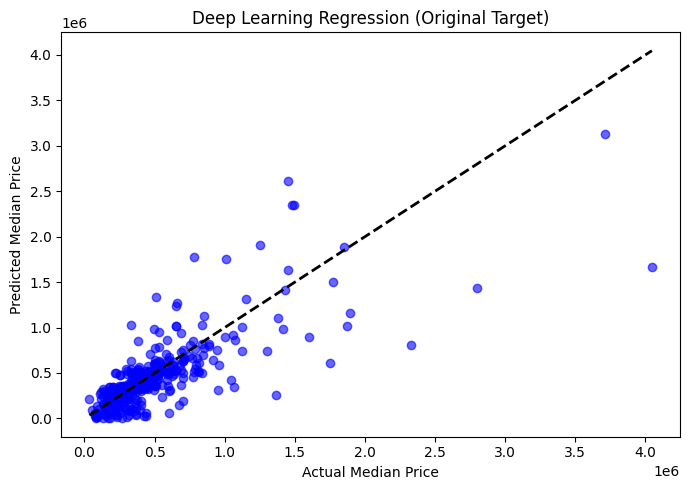

In [ ]:
# Load Dataset
df1 = pd.read_csv("malaysia_house_price_data_2025_label_encoded.csv")

# Separate Features and Target
X = df1.drop(columns="Median_Price")
y = df1["Median_Price"].values.reshape(-1, 1)

# Step 3: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Model1 (Sequential Model): FeedForward Neural Network
model1 = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),

    # Initialise weights using He normal initialisation w/ L2 regularisation
    layers.Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(), 
    layers.Dropout(0.4), # 40% of neurons ignored

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3), # 40% of neurons ignored

    layers.Dense(64, activation='relu'), # Rectified Linear Unit
    layers.Dense(1)
])

model1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='mse',
    metrics=['mae']
)

history1 = model1.fit(
    X_train_scaled, y_train,
    validation_split=0.4,
    epochs=200,
    batch_size=28,
    verbose=1
)

# Predictions

y_pred_dl = model1.predict(X_test_scaled).flatten()
y_actual = y_test.flatten()

# Evaluate Deep Learning
mae_dl = mean_absolute_error(y_actual, y_pred_dl)
rmse_dl = np.sqrt(mean_squared_error(y_actual, y_pred_dl))
r2_dl = r2_score(y_actual, y_pred_dl)

print("\n--- Deep Learning Results ---")
print(f"MAE  = {mae_dl:,.2f}")
print(f"RMSE = {rmse_dl:,.2f}")
print(f"R²   = {r2_dl:.3f}")


# Plot Actual vs Predicted

plt.figure(figsize=(7,5))
plt.scatter(y_actual, y_pred_dl, color='blue', alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         'k--', lw=2)
plt.xlabel("Actual Median Price")
plt.ylabel("Predicted Median Price")
plt.title("Deep Learning Regression (Original Target)")
plt.tight_layout()
plt.show()

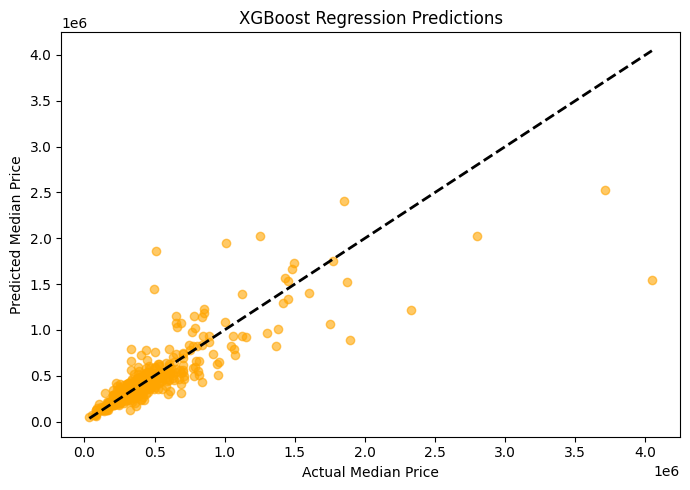

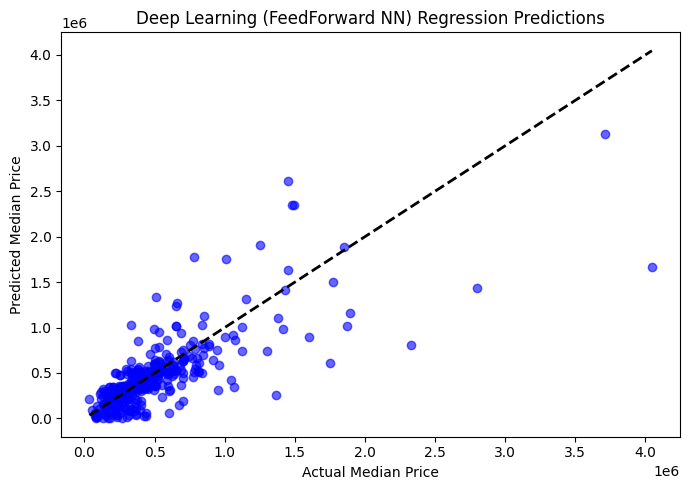

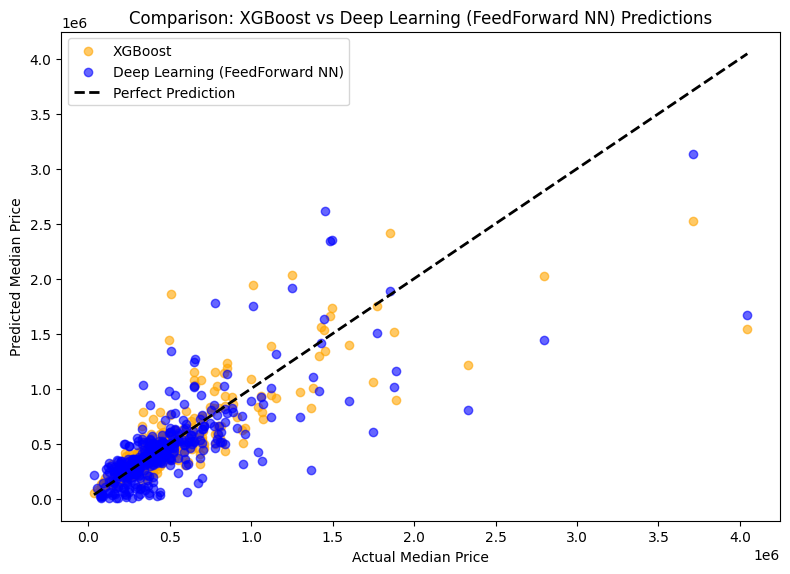

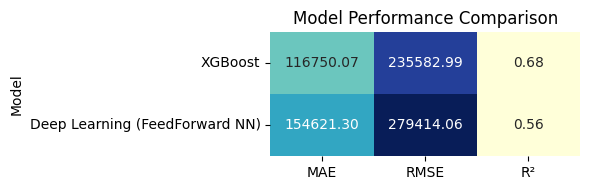


--- Model Comparison Table ---
                            Model            MAE           RMSE        R²
0                         XGBoost  116750.071045  235582.991791  0.684518
1  Deep Learning (FeedForward NN)  154621.295933  279414.055333  0.556204


In [7]:
import seaborn as sns
import pandas as pd

# XGBoost Prediction vs Actual
plt.figure(figsize=(7, 5))
plt.scatter(y_actual, y_pred, color='orange', alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         'k--', lw=2)
plt.xlabel("Actual Median Price")
plt.ylabel("Predicted Median Price")
plt.title("XGBoost Regression Predictions")
plt.tight_layout()
plt.show()

# Deep Learning Prediction vs Actual
plt.figure(figsize=(7, 5))
plt.scatter(y_actual, y_pred_dl, color='blue', alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         'k--', lw=2)
plt.xlabel("Actual Median Price")
plt.ylabel("Predicted Median Price")
plt.title("Deep Learning (FeedForward NN) Regression Predictions")
plt.tight_layout()
plt.show()


# Combine Results for Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, color='orange', alpha=0.6, label='XGBoost')
plt.scatter(y_actual, y_pred_dl, color='blue', alpha=0.6, label='Deep Learning (FeedForward NN)')
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Median Price")
plt.ylabel("Predicted Median Price")
plt.title("Comparison: XGBoost vs Deep Learning (FeedForward NN) Predictions")
plt.legend()
plt.tight_layout()
plt.show()

# --- Comparison Table ---
comparison_df = pd.DataFrame({
    "Model": ["XGBoost", "Deep Learning (FeedForward NN)"],
    "MAE": [mae, mae_dl],
    "RMSE": [rmse, rmse_dl],
    "R²": [r2, r2_dl]
})

# Use seaborn to make a nicer table-like heatmap
plt.figure(figsize=(6, 2))
sns.heatmap(comparison_df.set_index("Model"), annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)
plt.title("Model Performance Comparison")
plt.tight_layout()
plt.show()

# Also print table in text form
print("\n--- Model Comparison Table ---")
print(comparison_df)


In [ ]:
# Compute approximate accuracy percentage
accuracy = 100 * r2
accuracy_dl = 100 * r2_dl

# Add to comparison table
comparison_df["Accuracy (%)"] = [accuracy, accuracy_dl]

# Heatmap with accuracy
plt.figure(figsize=(6, 2))
sns.heatmap(comparison_df.set_index("Model"), annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)
plt.title("Model Performance Comparison")
plt.tight_layout()
plt.show()

# Print updated table
print("Model Comparison Table with Accuracy (%)")
print(comparison_df)


NameError: name 'r2' is not defined